# HEALTH EXPECTATION

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
df = sns.load_dataset('healthexp')

In [4]:
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


## 1) Discrete / Continuous Variables
 - Varaibles Discrètes : Year, Country
 - Variables continues : Spending_USD, Life_Expectancy

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB


## 2) Analyse de la variable "Country"
**Conclusion :** 
 - Nous ne disposons pas de toutes les données pour la Germany, Canada, Great Britain et la France sur toute la perdiode allant de 1970 à 2020.
 - La France est le pays ayant le moins de données sur la période allant de 1970 à 2020 (35/51).

In [8]:
df['Country'].value_counts()

Country
Japan            51
USA              51
Germany          50
Canada           44
Great Britain    43
France           35
Name: count, dtype: int64

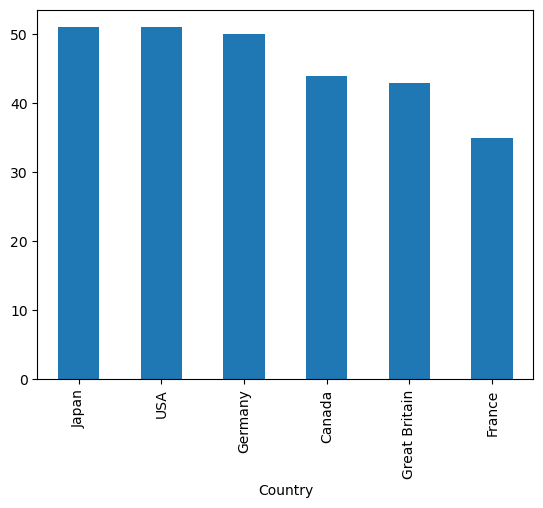

In [9]:
df['Country'].value_counts().plot(kind='bar');

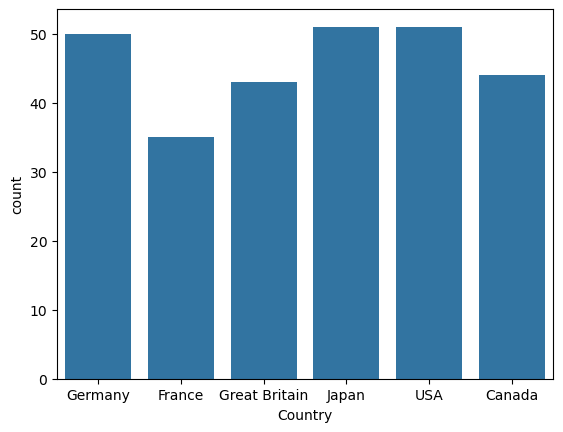

In [10]:
sns.countplot(df, x='Country');

## 3) Analyse de la variable "Spending_USD"
**Conclusion :**
 - La dépense de santé annuelle moyenne par habitant de tous les pays sur la période allant de 1970 à 2020 est de 2789.3 USD.

In [12]:
df['Spending_USD'].describe()

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

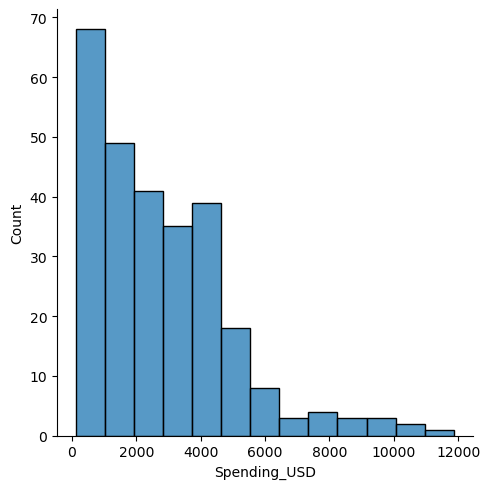

In [13]:
sns.displot(df['Spending_USD']);

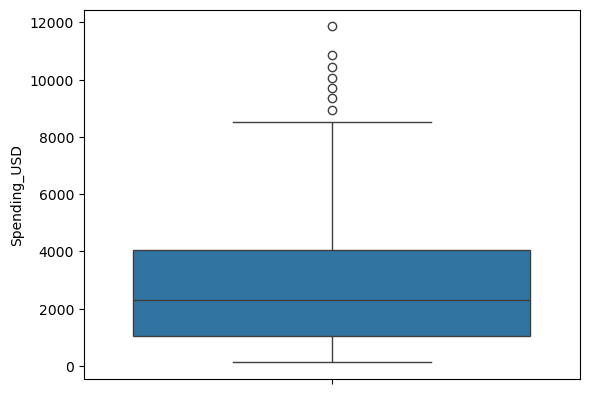

In [14]:
sns.boxplot(df['Spending_USD']);

## 4) Analyse de la variable "Life_Expectancy"
 - L'espérance de vie moyenne pour tous les pays sur la période allant de 1970 à 2020 est de 77.9 ans.

In [16]:
df['Life_Expectancy'].describe()

count    274.000000
mean      77.909489
std        3.276263
min       70.600000
25%       75.525000
50%       78.100000
75%       80.575000
max       84.700000
Name: Life_Expectancy, dtype: float64

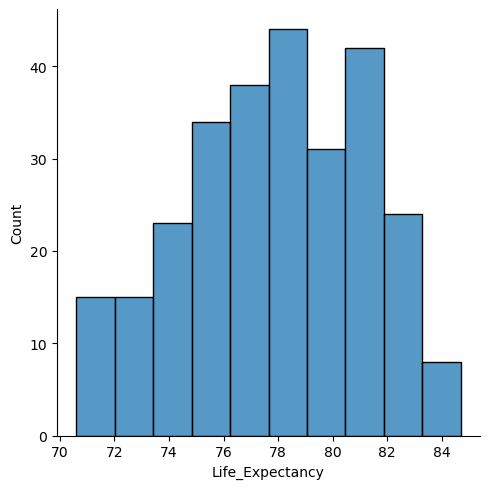

In [17]:
sns.displot(df['Life_Expectancy']);

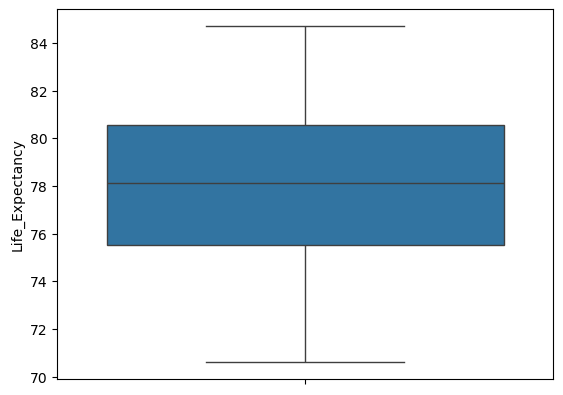

In [18]:
sns.boxplot(df['Life_Expectancy']);

## 5) Evolution de la durée de vie en fonction du temps
**Hypothèse**
 - La moyenne de l'espérance de vie des pays est en lègère augmentation au fil du temps, de 1970 à 2020.

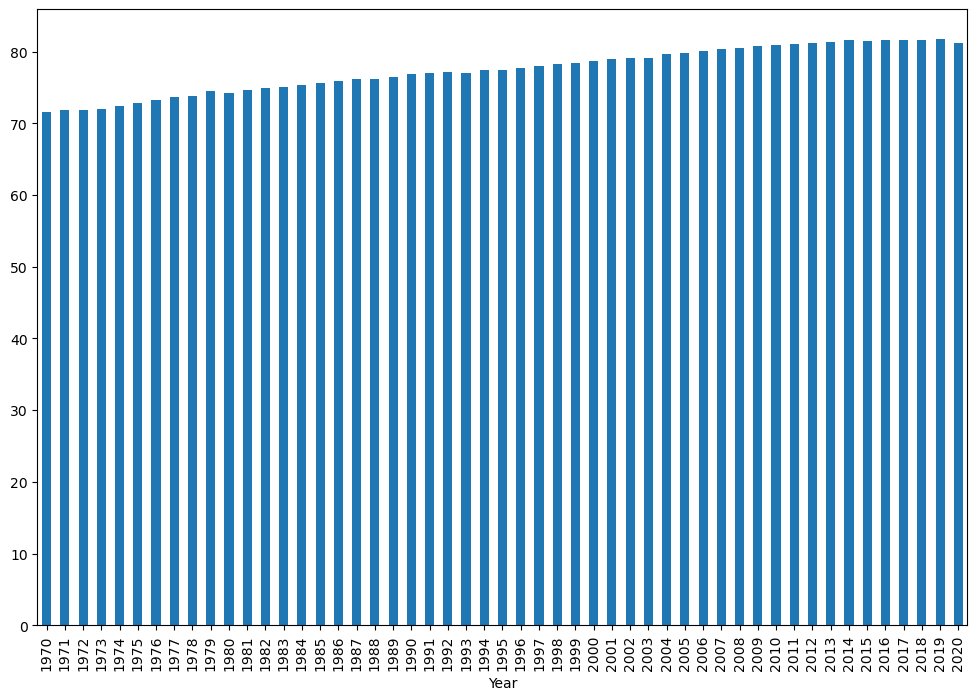

In [20]:
df.groupby('Year')['Life_Expectancy'].mean().plot.bar(figsize=(12, 8));

## 7) Evolution des dépenses en santé Germany et Great Britain
 - Les dépenses de santé de l'allemagne sont plus importantes que celles de la Grante-Bretagne au fil du temps, de 1970 à 2020.

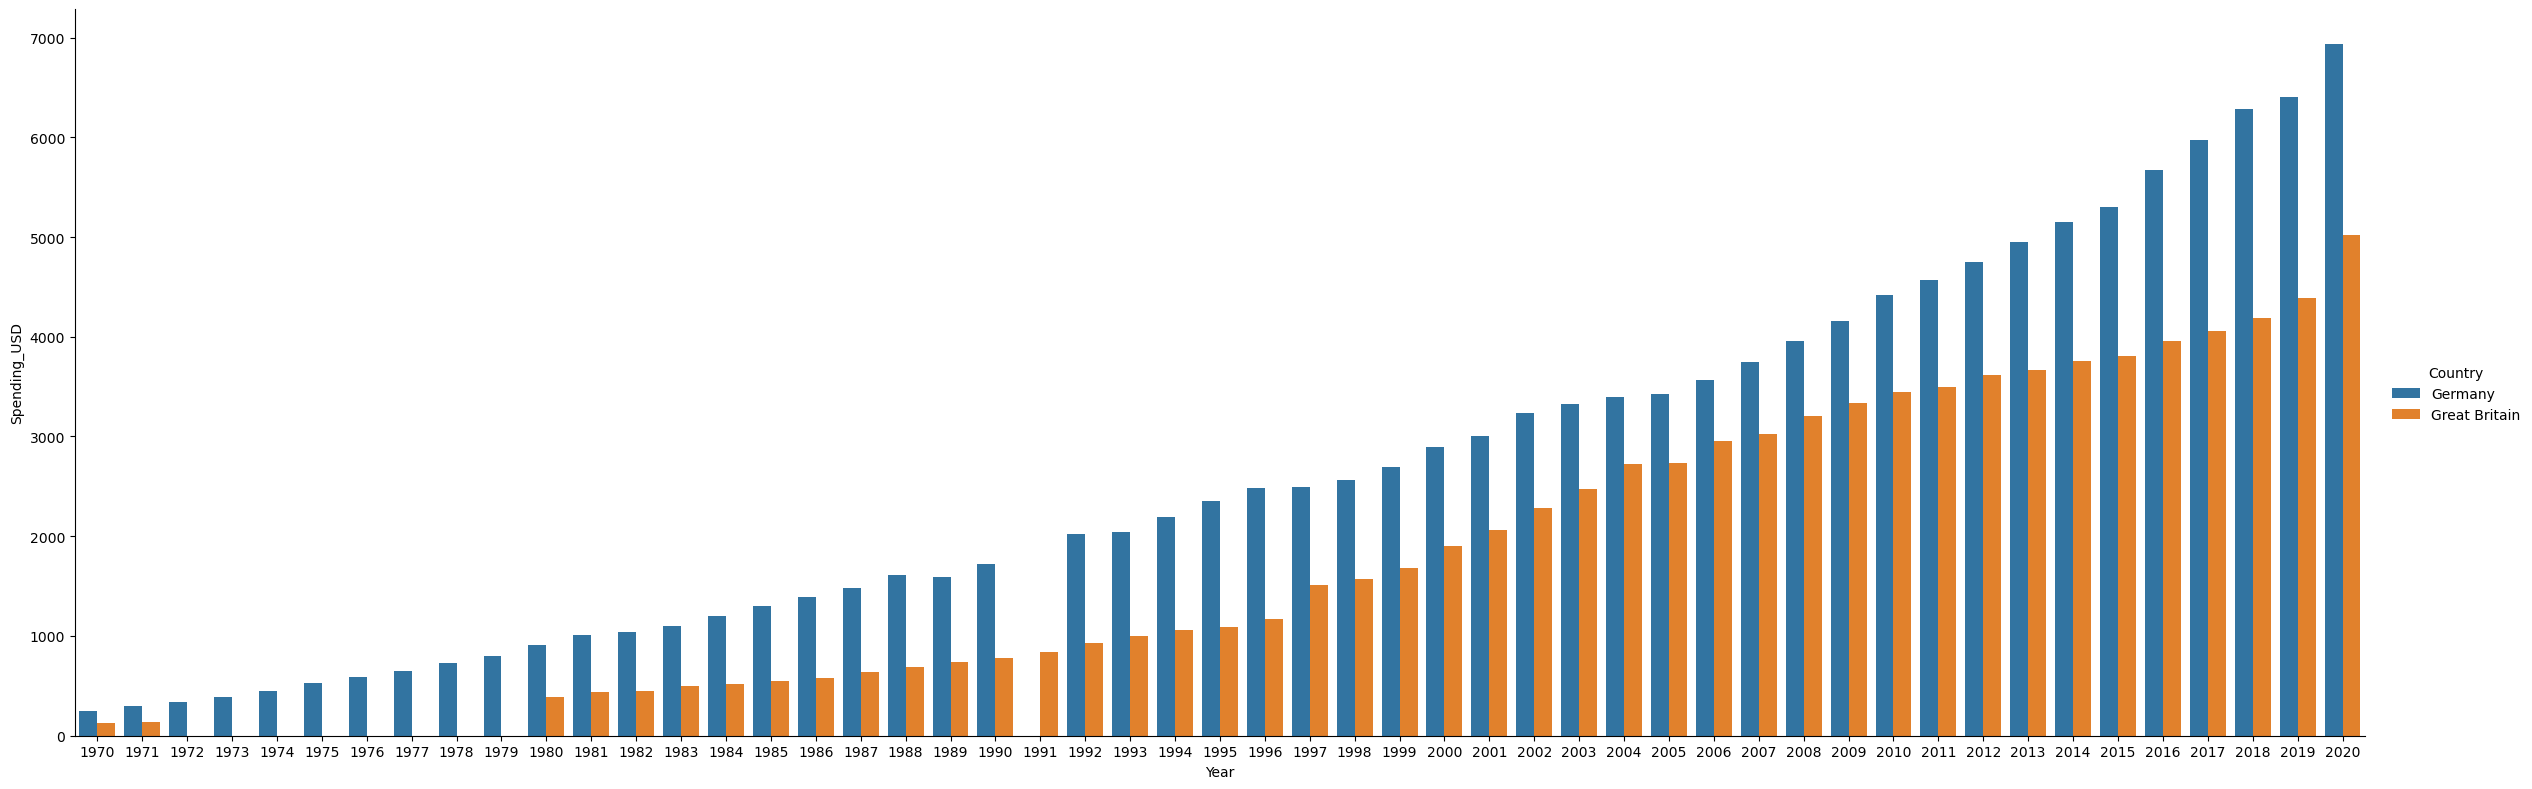

In [22]:
sns.catplot(
    data=df[df['Country'].isin(['Great Britain', 'Germany'])],
    x='Year',
    y='Spending_USD',
    kind='bar',
    hue='Country',
    height=8,
    aspect=3);

## 8) Observez l'histograme, la boxplot, et les statistiques de "Life_Expectancy" propre à chaque pays.

In [24]:
df['Country'].unique()

array(['Germany', 'France', 'Great Britain', 'Japan', 'USA', 'Canada'],
      dtype=object)


------------  Germany  ------------
Statistiques de Life_Expectancy
count    50.000000
mean     76.726000
std       3.473915
min      70.600000
25%      73.575000
50%      77.100000
75%      80.175000
max      81.300000
Name: Life_Expectancy, dtype: float64

Histogramme :


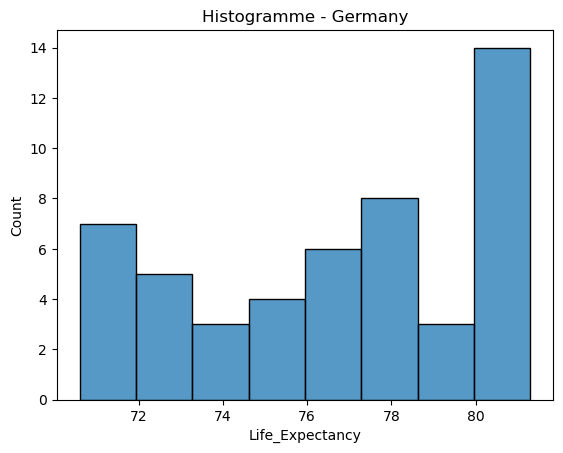


Boxplot


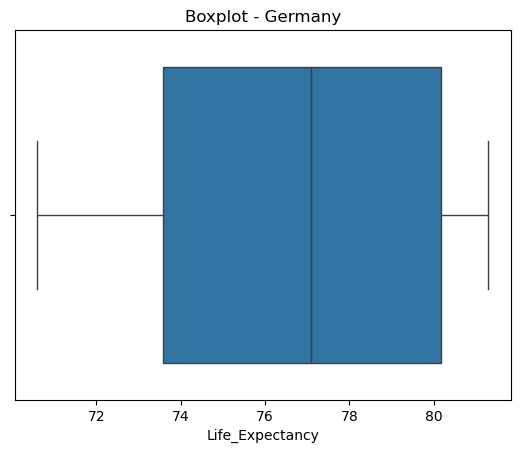


------------  France  ------------
Statistiques de Life_Expectancy
count    35.000000
mean     79.565714
std       2.862120
min      72.200000
25%      78.050000
50%      79.400000
75%      82.200000
max      82.900000
Name: Life_Expectancy, dtype: float64

Histogramme :


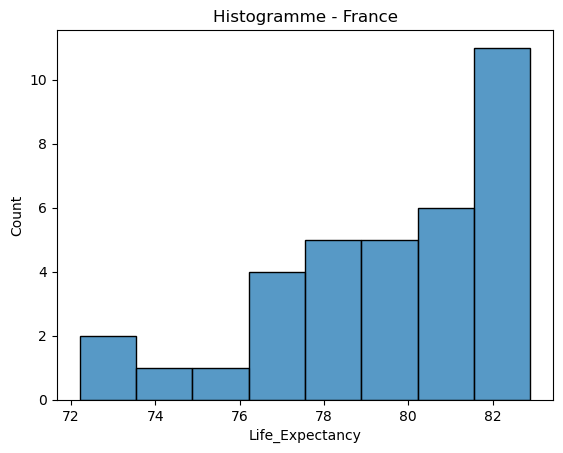


Boxplot


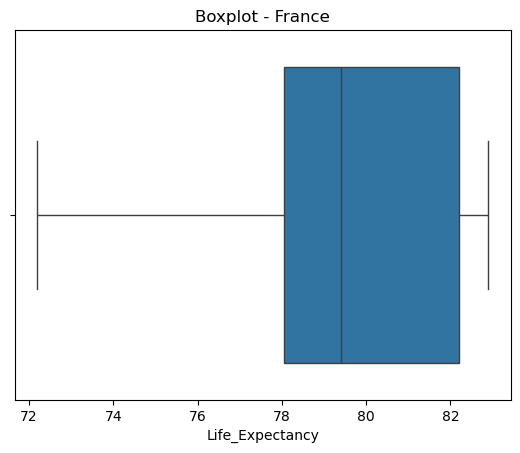


------------  Great Britain  ------------
Statistiques de Life_Expectancy
count    43.000000
mean     77.620930
std       2.827548
min      71.900000
25%      75.350000
50%      77.500000
75%      80.400000
max      81.400000
Name: Life_Expectancy, dtype: float64

Histogramme :


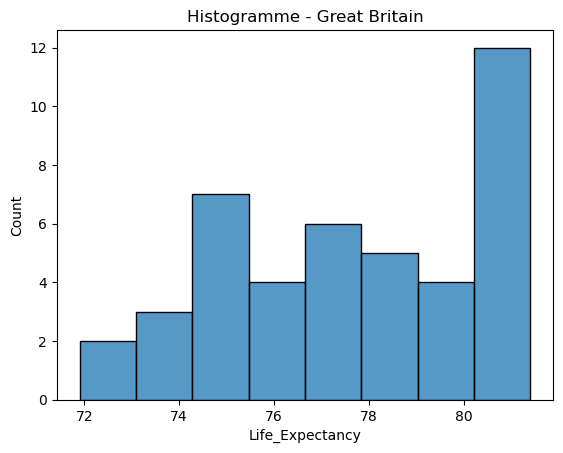


Boxplot


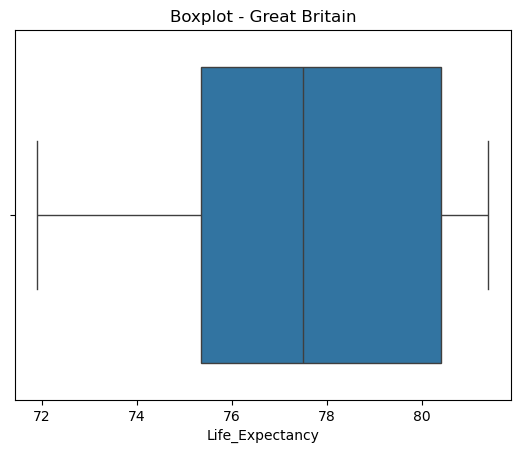


------------  Japan  ------------
Statistiques de Life_Expectancy
count    51.000000
mean     79.554902
std       3.547242
min      72.000000
25%      76.950000
50%      79.800000
75%      82.650000
max      84.700000
Name: Life_Expectancy, dtype: float64

Histogramme :


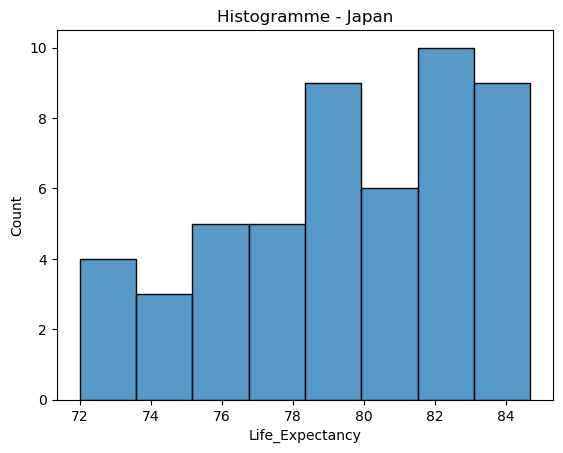


Boxplot


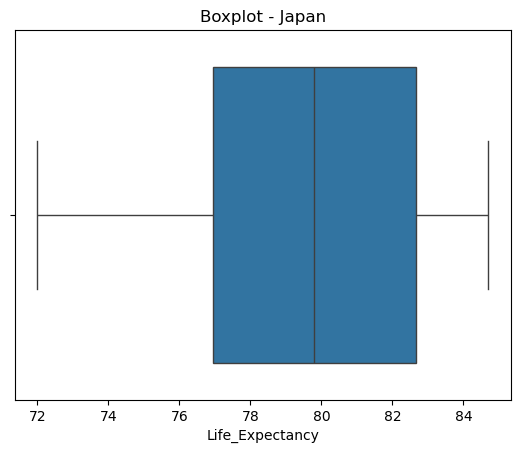


------------  USA  ------------
Statistiques de Life_Expectancy
count    51.000000
mean     75.843137
std       2.336258
min      70.900000
25%      74.550000
50%      75.700000
75%      77.950000
max      78.900000
Name: Life_Expectancy, dtype: float64

Histogramme :


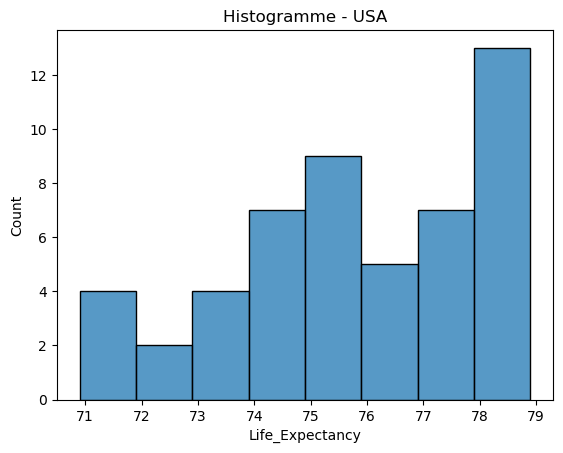


Boxplot


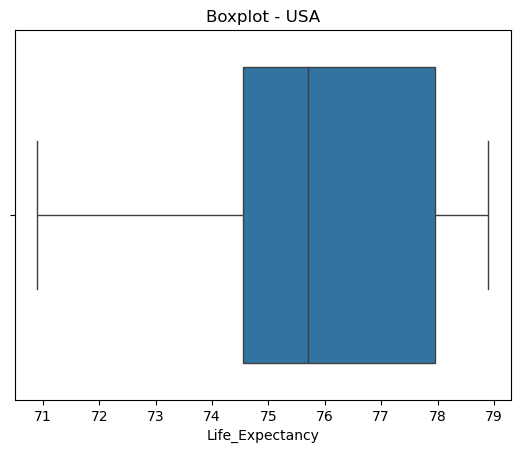


------------  Canada  ------------
Statistiques de Life_Expectancy
count    44.000000
mean     78.706818
std       2.502222
min      72.800000
25%      76.775000
50%      78.700000
75%      80.975000
max      82.200000
Name: Life_Expectancy, dtype: float64

Histogramme :


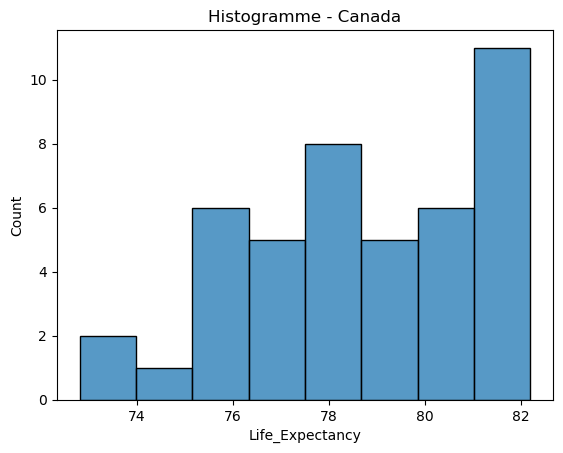


Boxplot


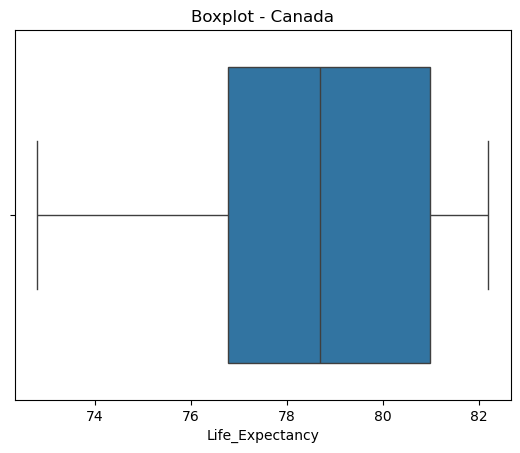

In [63]:
for country in df['Country'].unique():
    df_country = df[df['Country'] == country]
    
    print(f"\n------------  {country}  ------------")
    print('Statistiques de Life_Expectancy')
    print(df_country.describe()['Life_Expectancy'])
    
    print('\nHistogramme :')
    plt.figure()
    sns.histplot(data=df_country, x='Life_Expectancy', bins=8)
    plt.title(f"Histogramme - {country}")
    plt.show()
    
    
    print('\n''Boxplot')
    plt.figure()
    sns.boxplot(data=df_country,  x='Life_Expectancy')
    plt.title(f"Boxplot - {country}")
    plt.show()

##  Observez la relation entre la durée de vie et les dépenses dans la santé, aux États-Unis, de 2000 à 2020
 - Les 

In [80]:
USA = df[(df['Country'] == 'USA') & (df['Year'] >= 2000)]

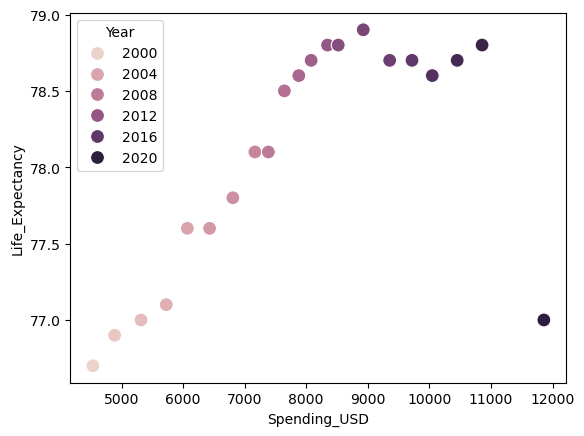

In [132]:
sns.scatterplot(data=USA, x='Spending_USD', y='Life_Expectancy', hue='Year', s=100);

## Il y a une valeur abérante tant tout cela. Laquelle? Pourquoi?
 - La valeur (2020, 11859.17) est une valeur abérrante, car d'après le diagramme dépenses-espérance, ce n'est pas logique d'avoir pour une telle dépense pour une espérance de vie aussi faible (77 ans) d'autant en 2019 l'espérance  était de 79 ans.

In [139]:
USA[(USA['Spending_USD'] > 11000) & (USA['Life_Expectancy'] < 77.5)]

,Year,Country,Spending_USD,Life_Expectancy
273,2020,USA,11859.179,77.0
